**Introduction to Deep Learning	(TKO_7094)<br> 
Arvin Jalali<br>**

*Project Description:*<BR><BR>
Build a CNN from scratch and try to achieve the highest possible accuracy with the MNIST dataset.

The MNIST data set (https://www.tensorflow.org/datasets/catalog/mnist) is used to train handwritten digit recognition models.
This is basically a classification model with 10 classes.

Here is a keras / tensorflow example (not CNN) for loading and training a model with MNIST: https://www.tensorflow.org/datasets/keras_example

The parameters for training a model can be found at https://keras.io/api/models/model_training_apis/

Your tasks:

1. Load the MNSIT data set and split into training and test sets.

2. Build a CNN with at least one convolutional layer and 2 or more hidden layers and a dense output layer for 10 classes.

3. Train your CNN on the MNIST training set (extracted in step 1).

4. Evaluate your trained model using the test data set. What is the accuracy of your model?

5. Do the following experiments to improve accuracy:
    - increase the size and depth of the inner layers, what is the effect on the model accuracy?
    - experiment with different activation functions in the inner layers (relu, sigmoid, softmask, etc), see the list of keras activation functions at https://keras.io/api/layers/activations/
    - what is the effect of using different activation functions? how about combining the activation function choice with different network size and depth?
    - experiment with various optimizers (https://keras.io/api/optimizers/) and learning rate. What is the effect on the resulting model accuracy?
    - with all the above variations, experiment with various batch sizes and epochs for training (see https://keras.io/api/models/model_training_apis/)
    - what happens if we don't use any CNN layer? (considering the model in https://www.tensorflow.org/datasets/keras_example).

6. Write a report on your observations on how the model performed with various experiments in step 5 and submit it along with the colab file.

**Please note that all of my reports are written within this notebook. For each experiment, I have a report written just prior to the corresponding code. Additionally, I provide a summary report at the end of this notebook to enhance its comprehensiveness.**

In [2]:
# import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values
X_train_full = X_train_full / 255.
X_test = X_test / 255.

# Split into training, validation, and test sets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Set random seed for reproducibility
np.random.seed(42)

# Shuffle training data
shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

11490434/11490434 [==============================] - 1s 0us/step


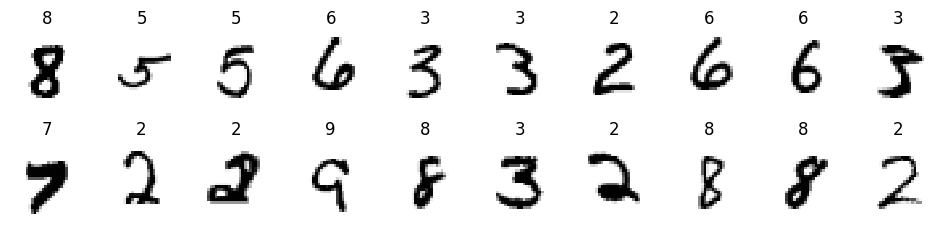

In [4]:
# Generating a grid of images from the MNIST dataset for visualization purposes
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(str(y_train[index]), fontsize=12)  # Directly accessing label instead of class name

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [5]:
# My functions are here if any

# To clear the current Keras session and releasing the resources associated with it
def free_memory():
  keras.backend.clear_session()

In [6]:
free_memory()

# Step 2: Build a CNN as the primary CNN model, and all the future models will be comapred with this!
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

This convolutional neural network (CNN) model is used for image classification tasks. It consists of two convolutional layers, each followed by max-pooling layers for feature extraction and dimensionality reduction. The model begins with a 32-filter convolutional layer, which is then pooled to extract dominant features. This is followed by another convolutional layer with 64 filters, further enhancing feature extraction. After another pooling step, the resulting features are flattened into a 1D vector. A fully connected layer with 64 neurons is employed for further abstraction, before finally reaching the output layer with 10 neurons, representing class probabilities through the softmax activation function.

In [77]:
# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 5s 4ms/step - loss: 0.1859 - accuracy: 0.9441 - val_loss: 0.0581 - val_accuracy: 0.9832
Epoch 2/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0516 - accuracy: 0.9842 - val_loss: 0.0435 - val_accuracy: 0.9868
Epoch 3/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0369 - accuracy: 0.9889 - val_loss: 0.0398 - val_accuracy: 0.9892
Epoch 4/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0355 - val_accuracy: 0.9896
Epoch 5/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0349 - val_accuracy: 0.9902
Epoch 6/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.0347 - val_accuracy: 0.9900
Epoch 7/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 

As we can see, the test accuracy for our primary CNN is 0.9902999997138977 rounded to four digits gives the number 0.9903. This value as test accuracy will be used frequently in future experiments.


### <font color='red'>Experiment 1: Increase the size and depth of the inner layers, what is the effect on the model accuracy? </font>
In this part, I try to change the number of filters and the dimensions of the filters. Also, I try to change the depth by adding some extra layers to the model to see what will happen to the generalization ability of the model on unseen data.

In the following code, I increased the number of filters in the first convolutional layer from 32 to 64. Also, I incresed the number of neurons in the fully connected (dense layer) from 64 to 128. As we can see in the following, the test accuracy increased to 0.9923 compared to the test accuracy of our primary model which was 0.9903.

In [37]:
free_memory()

model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(128, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 5s 5ms/step - loss: 0.1568 - accuracy: 0.9518 - val_loss: 0.0603 - val_accuracy: 0.9812
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0389 - val_accuracy: 0.9890
Epoch 3/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0308 - val_accuracy: 0.9908
Epoch 4/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0335 - val_accuracy: 0.9908
Epoch 5/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0444 - val_accuracy: 0.9856
Epoch 6/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.0378 - val_accuracy: 0.9894
Epoch 7/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0333 - val_accuracy: 0.9922
Epoch 

The following code is similar to the previous one, with a filter size of 64 for both convolutional layers and 128 neurons for the fully connected layer. However, I increased the dimensions of the filter in both convolutional layers to be 5x5. As we can see, the test accuracy is 0.9915, which is slightly lower than the 0.9923 achieved in the previous experiment, but higher than the test accuracy of the primary model (0.9903).

After conducting a little research, I learned that 3x3 filters are commonly used in many CNN architectures for image classification tasks, including those applied to the MNIST dataset. While 5x5 filters are less common for MNIST due to the small size of the images, they can capture slightly larger spatial patterns in the input images.

In [78]:
free_memory()

model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(128, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 6s 5ms/step - loss: 0.1426 - accuracy: 0.9562 - val_loss: 0.0497 - val_accuracy: 0.9842
Epoch 2/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0412 - val_accuracy: 0.9882
Epoch 3/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0359 - val_accuracy: 0.9888
Epoch 4/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.0361 - val_accuracy: 0.9902
Epoch 5/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0311 - val_accuracy: 0.9912
Epoch 6/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0328 - val_accuracy: 0.9922
Epoch 7/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.0364 - val_accuracy: 0.9912
Epoch 

In the following code, I enhanced the depth of the CNN model compared to the primary CNN by incorporating an additional convolutional layer with 128 filters, each having dimensions of 3 by 3. As evident from the results, the test accuracy increases to 0.9912, showing a slight improvement over the test accuracy of the primary CNN, which was 0.9903.

In [38]:
free_memory()

model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Additional Convolutional Layer 3
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 6s 5ms/step - loss: 0.1720 - accuracy: 0.9493 - val_loss: 0.0624 - val_accuracy: 0.9824
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.0439 - val_accuracy: 0.9864
Epoch 3/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0472 - val_accuracy: 0.9888
Epoch 4/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0308 - val_accuracy: 0.9904
Epoch 5/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0284 - val_accuracy: 0.9934
Epoch 6/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 0.0340 - val_accuracy: 0.9908
Epoch 7/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0258 - val_accuracy: 0.9932
Epoch 

In the following code, I conducted an experiment with more substantial changes compared to the primary CNN. I simultaneously increased the number of filters in the convolutional layers and the number of neurons in the fully connected layer. Additionally, I added one extra convolutional layer and one extra fully connected layer compared to the primary model.

Despite these modifications, the test accuracy achieved is 0.9869, which is slightly lower than the test accuracy of the primary CNN, which was 0.9903.

In [39]:
free_memory()

model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 3
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 3
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(256, activation='relu'),
    # Fully Connected (Dense) Layer 2
    keras.layers.Dense(128, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 7s 6ms/step - loss: 0.2019 - accuracy: 0.9376 - val_loss: 0.0750 - val_accuracy: 0.9786
Epoch 2/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0609 - accuracy: 0.9809 - val_loss: 0.0709 - val_accuracy: 0.9808
Epoch 3/10
860/860 [==============================] - 5s 5ms/step - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.0530 - val_accuracy: 0.9874
Epoch 4/10
860/860 [==============================] - 5s 5ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0509 - val_accuracy: 0.9856
Epoch 5/10
860/860 [==============================] - 6s 7ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0421 - val_accuracy: 0.9900
Epoch 6/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0464 - val_accuracy: 0.9880
Epoch 7/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0540 - val_accuracy: 0.9864
Epoch 

### <font color='red'>Experiment 2: Try with different activation functions in the inner layers, what is the effect of using different activation functions? how about combining the activation function choice with different network size and depth?</font>

In the following code, I performed an experiment using the sigmoid activation function compared to the primary CNN, which had the ReLU activation function. As seen below, the test accuracy is 0.9881, slightly lower than the test accuracy of the primary CNN, which was 0.9903.

After conducting some research on which activation functions yield the highest accuracy for CNNs working on the MNIST dataset, I plan to repeat experiments later using activation functions such as ReLU, ReLU6, and Leaky ReLU.

In [41]:
free_memory()

# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='sigmoid'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='sigmoid'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 5s 4ms/step - loss: 0.9190 - accuracy: 0.7020 - val_loss: 0.2623 - val_accuracy: 0.9318
Epoch 2/10
860/860 [==============================] - 4s 5ms/step - loss: 0.1910 - accuracy: 0.9465 - val_loss: 0.1185 - val_accuracy: 0.9694
Epoch 3/10
860/860 [==============================] - 4s 4ms/step - loss: 0.1108 - accuracy: 0.9686 - val_loss: 0.0862 - val_accuracy: 0.9764
Epoch 4/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0817 - accuracy: 0.9761 - val_loss: 0.0664 - val_accuracy: 0.9822
Epoch 5/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0644 - accuracy: 0.9813 - val_loss: 0.0642 - val_accuracy: 0.9828
Epoch 6/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0540 - accuracy: 0.9840 - val_loss: 0.0591 - val_accuracy: 0.9838
Epoch 7/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0493 - val_accuracy: 0.9858
Epoch 

In the following code, I conducted an experiment using the softmax activation function in the inner layers of the CNN. As can be seen, the test accuracy decreased considerably to 0.9174 compared to the primary CNN, which had ReLU as the activation function of the inner layers, achieving a test accuracy of 0.9903.

Upon further investigation, I discovered that while the softmax activation function is typically utilized in the output layer for multi-class classification, it poses limitations when applied to inner layers of a CNN. In this context, softmax restricts each neuron's output to a range between 0 and 1, potentially hindering the network's ability to effectively distinguish complex features and patterns within the MNIST dataset. Consequently, this constraint may compromise the network's overall learning capability.

In [42]:
free_memory()

# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='softmax', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='softmax'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='softmax'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 6s 5ms/step - loss: 1.9815 - accuracy: 0.3379 - val_loss: 1.3487 - val_accuracy: 0.6116
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 1.0839 - accuracy: 0.6154 - val_loss: 0.9035 - val_accuracy: 0.6232
Epoch 3/10
860/860 [==============================] - 4s 4ms/step - loss: 0.8479 - accuracy: 0.6236 - val_loss: 0.7837 - val_accuracy: 0.6402
Epoch 4/10
860/860 [==============================] - 5s 5ms/step - loss: 0.7666 - accuracy: 0.6403 - val_loss: 0.7335 - val_accuracy: 0.6482
Epoch 5/10
860/860 [==============================] - 4s 5ms/step - loss: 0.7219 - accuracy: 0.6592 - val_loss: 0.6785 - val_accuracy: 0.7508
Epoch 6/10
860/860 [==============================] - 4s 4ms/step - loss: 0.6212 - accuracy: 0.7498 - val_loss: 0.5688 - val_accuracy: 0.7630
Epoch 7/10
860/860 [==============================] - 4s 5ms/step - loss: 0.5443 - accuracy: 0.7733 - val_loss: 0.5123 - val_accuracy: 0.7882
Epoch 

In the following code, I used the Leaky ReLU activation function compared to the ReLU activation function in the primary CNN. I achieved a test accuracy of 0.9908, which is a slight improvement compared to the primary CNN with ReLU activation function in the inner layers, which had a test accuracy of 0.9903.

After some research, I learned that ReLU sets negative inputs to zero, while Leaky ReLU allows a small, non-zero gradient for negative inputs. This prevents neurons from completely dying out and potentially improves convergence and generalization in deeper networks.

In [43]:
free_memory()

# Define Leaky ReLU activation function
def leaky_relu(x):
    alpha = 0.1  # Define the slope of the negative part
    return keras.activations.relu(x, alpha=alpha)

# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation=leaky_relu, input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation=leaky_relu),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation=leaky_relu),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 6s 5ms/step - loss: 0.1715 - accuracy: 0.9479 - val_loss: 0.0571 - val_accuracy: 0.9822
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0524 - accuracy: 0.9835 - val_loss: 0.0435 - val_accuracy: 0.9870
Epoch 3/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0363 - accuracy: 0.9881 - val_loss: 0.0387 - val_accuracy: 0.9896
Epoch 4/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0379 - val_accuracy: 0.9898
Epoch 5/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0369 - val_accuracy: 0.9890
Epoch 6/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0367 - val_accuracy: 0.9904
Epoch 7/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.0354 - val_accuracy: 0.9900
Epoch 

In the following code, after a little research, I aimed to enhance the model's generalization ability by adding a couple of Dropout layers and utilizing ReLU activation function in both convolutional and fully connected layers. Surprisingly, I achieved an test accuracy of 0.9922, an improvement compared to the primary model's test accuracy of 0.9903.

I found that Dropout layers randomly deactivate a portion of neurons during training, preventing overfitting by promoting robust feature learning. In a CNN on MNIST, they enhance generalization by reducing neuron co-dependency, making the model less sensitive to noise and variations in data, thus improving performance on unseen samples.

In [45]:
free_memory()

# Define the CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 7s 6ms/step - loss: 0.2214 - accuracy: 0.9330 - val_loss: 0.0598 - val_accuracy: 0.9822
Epoch 2/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0847 - accuracy: 0.9747 - val_loss: 0.0460 - val_accuracy: 0.9876
Epoch 3/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0634 - accuracy: 0.9812 - val_loss: 0.0383 - val_accuracy: 0.9894
Epoch 4/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0531 - accuracy: 0.9835 - val_loss: 0.0391 - val_accuracy: 0.9892
Epoch 5/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0320 - val_accuracy: 0.9918
Epoch 6/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0306 - val_accuracy: 0.9924
Epoch 7/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0335 - accuracy: 0.9889 - val_loss: 0.0310 - val_accuracy: 0.9920
Epoch 

In the following code, I replicated the previous experiment with a couple of dropout layers, but I introduced an additional (third) convolutional layer, using ReLU activation function in the inner layers. Surprisingly, I achieved an improved test accuracy of 0.9939, which is higher than the 0.9922 obtained in the previous experiment.

In [46]:
free_memory()

# Define the CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 7s 6ms/step - loss: 0.2590 - accuracy: 0.9209 - val_loss: 0.0512 - val_accuracy: 0.9864
Epoch 2/10
860/860 [==============================] - 6s 7ms/step - loss: 0.0814 - accuracy: 0.9780 - val_loss: 0.0377 - val_accuracy: 0.9898
Epoch 3/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0558 - accuracy: 0.9850 - val_loss: 0.0343 - val_accuracy: 0.9912
Epoch 4/10
860/860 [==============================] - 6s 7ms/step - loss: 0.0475 - accuracy: 0.9874 - val_loss: 0.0304 - val_accuracy: 0.9930
Epoch 5/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0383 - accuracy: 0.9898 - val_loss: 0.0288 - val_accuracy: 0.9926
Epoch 6/10
860/860 [==============================] - 6s 6ms/step - loss: 0.0342 - accuracy: 0.9911 - val_loss: 0.0328 - val_accuracy: 0.9930
Epoch 7/10
860/860 [==============================] - 5s 6ms/step - loss: 0.0287 - accuracy: 0.9920 - val_loss: 0.0331 - val_accuracy: 0.9928
Epoch 

In the following code, I experimented with the ReLU6 activation function as a comparison to the primary CNN, which used the ReLU activation function. I maintained the same size, depth, and inner layers as the primary CNN. The resulting test accuracy was 0.9898, slightly lower than the primary CNN's accuracy of 0.9903.

ReLU6, a variation of ReLU activation function commonly employed in neural networks, sets all negative values to zero like ReLU but additionally imposes an upper limit on positive values it generates.

In [47]:
free_memory()

model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu6', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu6'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(128, activation='relu6'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 6s 5ms/step - loss: 0.1539 - accuracy: 0.9542 - val_loss: 0.0555 - val_accuracy: 0.9824
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0395 - val_accuracy: 0.9886
Epoch 3/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.0317 - val_accuracy: 0.9904
Epoch 4/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0317 - val_accuracy: 0.9914
Epoch 5/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0346 - val_accuracy: 0.9912
Epoch 6/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0383 - val_accuracy: 0.9886
Epoch 7/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.0371 - val_accuracy: 0.9906
Epoch 

### <font color='red'>Experiment 3: Try with various optimizers and learning rate. What is the effect on the resulting model accuracy?</font>

In TensorFlow's Keras API, the default learning rate for the Adam optimizer is indeed 0.001, and the primary CNN utilized the Adam optimizer with the default learning rate. In the following code, I changed the learning rate to 0.01 while still using the Adam optimizer to observe the resulting test accuracy. As shown in the following, the test accuracy decreased to 0.9871, which is a decrease compared to the 0.9903 achieved by the primary CNN.

In [48]:
free_memory()

# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.01)  # Set an appropriate learning rate
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 5s 4ms/step - loss: 0.1369 - accuracy: 0.9583 - val_loss: 0.0685 - val_accuracy: 0.9820
Epoch 2/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0642 - accuracy: 0.9808 - val_loss: 0.0768 - val_accuracy: 0.9774
Epoch 3/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0508 - accuracy: 0.9845 - val_loss: 0.0644 - val_accuracy: 0.9822
Epoch 4/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0453 - accuracy: 0.9868 - val_loss: 0.0663 - val_accuracy: 0.9832
Epoch 5/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0415 - accuracy: 0.9876 - val_loss: 0.0633 - val_accuracy: 0.9830
Epoch 6/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0425 - accuracy: 0.9879 - val_loss: 0.0806 - val_accuracy: 0.9814
Epoch 7/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0351 - accuracy: 0.9903 - val_loss: 0.0861 - val_accuracy: 0.9860
Epoch 

In the following code, I utilized the Adam optimizer with a learning rate of 0.05. The test accuracy decreased significantly to 0.8628, which is quite poor compared to the test accuracy of 0.9903 achieved by the primary CNN using the Adam optimizer with a default learning rate of 0.001.


In [49]:
free_memory()

# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.05)  # Set an appropriate learning rate
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 5s 4ms/step - loss: 0.7217 - accuracy: 0.7718 - val_loss: 0.4848 - val_accuracy: 0.8530
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 0.5247 - accuracy: 0.8360 - val_loss: 0.4266 - val_accuracy: 0.8620
Epoch 3/10
860/860 [==============================] - 4s 5ms/step - loss: 0.5050 - accuracy: 0.8421 - val_loss: 0.4734 - val_accuracy: 0.8576
Epoch 4/10
860/860 [==============================] - 3s 4ms/step - loss: 0.4878 - accuracy: 0.8473 - val_loss: 0.4716 - val_accuracy: 0.8674
Epoch 5/10
860/860 [==============================] - 3s 4ms/step - loss: 0.4849 - accuracy: 0.8483 - val_loss: 0.4416 - val_accuracy: 0.8680
Epoch 6/10
860/860 [==============================] - 4s 4ms/step - loss: 0.4792 - accuracy: 0.8507 - val_loss: 0.4469 - val_accuracy: 0.8724
Epoch 7/10
860/860 [==============================] - 4s 4ms/step - loss: 0.4778 - accuracy: 0.8505 - val_loss: 0.4915 - val_accuracy: 0.8546
Epoch 

In the following code, I conducted another experiment with a low learning rate of 0.0001 for the Adam optimizer to observe its effect. The test accuracy achieved was 0.9847, which is only slightly less than the 0.9903 achieved by the primary CNN using the Adam optimizer with a default learning rate of 0.001. I expected to observe a considerable change in test accuracy due to the small learning rate, but it did not occur.

In [50]:
free_memory()

# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.0001)  # Set an appropriate learning rate
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 5s 4ms/step - loss: 0.6123 - accuracy: 0.8341 - val_loss: 0.1979 - val_accuracy: 0.9450
Epoch 2/10
860/860 [==============================] - 4s 5ms/step - loss: 0.1658 - accuracy: 0.9512 - val_loss: 0.1192 - val_accuracy: 0.9682
Epoch 3/10
860/860 [==============================] - 3s 4ms/step - loss: 0.1143 - accuracy: 0.9665 - val_loss: 0.0932 - val_accuracy: 0.9746
Epoch 4/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0911 - accuracy: 0.9731 - val_loss: 0.0769 - val_accuracy: 0.9778
Epoch 5/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0767 - accuracy: 0.9772 - val_loss: 0.0722 - val_accuracy: 0.9778
Epoch 6/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0664 - accuracy: 0.9802 - val_loss: 0.0603 - val_accuracy: 0.9828
Epoch 7/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0600 - val_accuracy: 0.9828
Epoch 

In the following code, I conducted an experiment using the SGD optimizer with a learning rate of 0.01. The resulting test accuracy is 0.9893.

In [51]:
free_memory()

# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd_optimizer,
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 5s 5ms/step - loss: 0.2725 - accuracy: 0.9157 - val_loss: 0.1044 - val_accuracy: 0.9670
Epoch 2/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0739 - accuracy: 0.9770 - val_loss: 0.0558 - val_accuracy: 0.9824
Epoch 3/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.0510 - val_accuracy: 0.9860
Epoch 4/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0472 - val_accuracy: 0.9866
Epoch 5/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0472 - val_accuracy: 0.9864
Epoch 6/10
860/860 [==============================] - 6s 7ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0432 - val_accuracy: 0.9882
Epoch 7/10
860/860 [==============================] - 6s 7ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0370 - val_accuracy: 0.9896
Epoch 

In the following, I conducted an experiment with the SGD optimizer and a high learning rate of 0.5, just to see what happens. As can be seen, the test accuracy is very poor, at 0.1010.

The extremely low accuracy of 0.1010 indicates that the model's training became unstable when using the SGD optimizer with a high learning rate of 0.5. This instability suggests that the optimization process overshot the optimal solution, resulting in erratic or incorrect predictions. It emphasizes the necessity of choosing appropriate learning rates and optimizer settings to ensure reliable training and convergence in neural networks.

In [53]:
free_memory()

# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.5, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd_optimizer,
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 4s 4ms/step - loss: 3.1094 - accuracy: 0.1133 - val_loss: 2.3190 - val_accuracy: 0.1100
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 2.3196 - accuracy: 0.1047 - val_loss: 2.3156 - val_accuracy: 0.1070
Epoch 3/10
860/860 [==============================] - 4s 4ms/step - loss: 2.3188 - accuracy: 0.1004 - val_loss: 2.3143 - val_accuracy: 0.1126
Epoch 4/10
860/860 [==============================] - 4s 4ms/step - loss: 2.3166 - accuracy: 0.1047 - val_loss: 2.3101 - val_accuracy: 0.1126
Epoch 5/10
860/860 [==============================] - 3s 4ms/step - loss: 2.3185 - accuracy: 0.1055 - val_loss: 2.3053 - val_accuracy: 0.0986
Epoch 6/10
860/860 [==============================] - 4s 5ms/step - loss: 2.3203 - accuracy: 0.1025 - val_loss: 2.3296 - val_accuracy: 0.0976
Epoch 7/10
860/860 [==============================] - 3s 4ms/step - loss: 2.3181 - accuracy: 0.1037 - val_loss: 2.3205 - val_accuracy: 0.1070
Epoch 

In the following code, the RMSprop optimizer with a learning rate of 0.001 was utilized. As can be seen, the test accuracy will be 0.9914, which is considered to be very good.

In [55]:
free_memory()

# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 5s 5ms/step - loss: 0.1871 - accuracy: 0.9417 - val_loss: 0.0741 - val_accuracy: 0.9826
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 0.0481 - val_accuracy: 0.9852
Epoch 3/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0399 - val_accuracy: 0.9886
Epoch 4/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.0344 - val_accuracy: 0.9906
Epoch 5/10
860/860 [==============================] - 4s 5ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0340 - val_accuracy: 0.9898
Epoch 6/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0374 - val_accuracy: 0.9908
Epoch 7/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.0350 - val_accuracy: 0.9908
Epoch 

### <font color='red'>Experiment 4: With all the above variations, experiment with various batch sizes and epochs for training.</font>
In the primary CNN, the number of epochs is set to 10, and the batch size is 64. In the following experiment, I will attempt to vary these parameters to observe their impact on test accuracy.

In the following code, I conducted an experiment by increasing the batch size to 256 compared to 64 in the primary CNN and the number of epochs is 10 (no change). As can be seen, the test accuracy remains at 0.9904, which is not considerably different from the test accuracy of 0.9903 for the primary CNN.

In [57]:
# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=256, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
215/215 [==============================] - 3s 7ms/step - loss: 0.3395 - accuracy: 0.9033 - val_loss: 0.1113 - val_accuracy: 0.9686
Epoch 2/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0812 - accuracy: 0.9754 - val_loss: 0.0605 - val_accuracy: 0.9832
Epoch 3/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0542 - accuracy: 0.9837 - val_loss: 0.0526 - val_accuracy: 0.9848
Epoch 4/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0427 - val_accuracy: 0.9896
Epoch 5/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0405 - val_accuracy: 0.9882
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0392 - val_accuracy: 0.9898
Epoch 7/10
215/215 [==============================] - 2s 7ms/step - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.0396 - val_accuracy: 0.9902
Epoch 

In the following code, I conducted an experiment by increasing the batch size to 1024 (as a very big batch size) compared to 64 in the primary CNN, and the number of epochs remains still 10 as before. As can be seen, the test accuracy will be 0.9872, which is less than the test accuracy of 0.9903 for the primary CNN.

In [58]:
# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=1024, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
54/54 [==============================] - 2s 19ms/step - loss: 0.8274 - accuracy: 0.7730 - val_loss: 0.2500 - val_accuracy: 0.9286
Epoch 2/10
54/54 [==============================] - 1s 15ms/step - loss: 0.1870 - accuracy: 0.9448 - val_loss: 0.1317 - val_accuracy: 0.9606
Epoch 3/10
54/54 [==============================] - 1s 15ms/step - loss: 0.1109 - accuracy: 0.9677 - val_loss: 0.0944 - val_accuracy: 0.9724
Epoch 4/10
54/54 [==============================] - 1s 15ms/step - loss: 0.0853 - accuracy: 0.9741 - val_loss: 0.0808 - val_accuracy: 0.9754
Epoch 5/10
54/54 [==============================] - 1s 15ms/step - loss: 0.0707 - accuracy: 0.9787 - val_loss: 0.0640 - val_accuracy: 0.9806
Epoch 6/10
54/54 [==============================] - 1s 15ms/step - loss: 0.0603 - accuracy: 0.9821 - val_loss: 0.0609 - val_accuracy: 0.9826
Epoch 7/10
54/54 [==============================] - 1s 15ms/step - loss: 0.0532 - accuracy: 0.9839 - val_loss: 0.0544 - val_accuracy: 0.9854
Epoch 8/10
54

In the following code, while keeping the batch size at 64, consistent with the primary CNN, I increased the number of epochs to 40 compared to 10 in the primary CNN. The test accuracy is 0.9914, slightly better than the 0.9903 achieved in the primary CNN.

In [59]:
# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=40, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/40
860/860 [==============================] - 5s 4ms/step - loss: 0.1898 - accuracy: 0.9436 - val_loss: 0.0651 - val_accuracy: 0.9790
Epoch 2/40
860/860 [==============================] - 4s 4ms/step - loss: 0.0570 - accuracy: 0.9821 - val_loss: 0.0463 - val_accuracy: 0.9872
Epoch 3/40
860/860 [==============================] - 4s 5ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0426 - val_accuracy: 0.9868
Epoch 4/40
860/860 [==============================] - 4s 4ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0335 - val_accuracy: 0.9894
Epoch 5/40
860/860 [==============================] - 3s 4ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0344 - val_accuracy: 0.9894
Epoch 6/40
860/860 [==============================] - 4s 4ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.0351 - val_accuracy: 0.9892
Epoch 7/40
860/860 [==============================] - 4s 4ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 

In the following code, I conducted another experiment by increasing the batch size from 64 to 128 and the number of epochs from 10 to 20 compared to the primary CNN. The test accuracy is 0.9900, which is slightly less than the 0.9903 achieved in the primary CNN.

In [60]:
# Step 2: Build a CNN
model = keras.models.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max Pooling Layer 2
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening Layer
    keras.layers.Flatten(),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=20, batch_size=128, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
430/430 [==============================] - 3s 5ms/step - loss: 0.2622 - accuracy: 0.9213 - val_loss: 0.0715 - val_accuracy: 0.9786
Epoch 2/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0632 - accuracy: 0.9811 - val_loss: 0.0652 - val_accuracy: 0.9792
Epoch 3/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0499 - val_accuracy: 0.9862
Epoch 4/20
430/430 [==============================] - 2s 5ms/step - loss: 0.0360 - accuracy: 0.9891 - val_loss: 0.0383 - val_accuracy: 0.9890
Epoch 5/20
430/430 [==============================] - 2s 5ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0473 - val_accuracy: 0.9866
Epoch 6/20
430/430 [==============================] - 2s 5ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.0330 - val_accuracy: 0.9900
Epoch 7/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0579 - val_accuracy: 0.9846
Epoch 

Finally, in the following code, I added an extra convolutional layer and one Dropout layer. I increased the number of neurons in the fully connected layer to 256. The activation function for inner layers is ReLU. I chose the Adam optimizer with a learning rate of 0.001. I selected a batch size of 64 and 15 epochs to observe the test accuracy. The attained test accuracy was 0.9889, falling short of my anticipated improvement.

In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=15, batch_size=64, validation_data=(X_valid.reshape(-1, 28, 28, 1), y_valid))

test_loss, test_accuracy = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print("Test Accuracy:", test_accuracy)



Epoch 1/15
860/860 [==============================] - 12s 6ms/step - loss: 0.2936 - accuracy: 0.9083 - val_loss: 0.0812 - val_accuracy: 0.9772
Epoch 2/15
860/860 [==============================] - 4s 4ms/step - loss: 0.0924 - accuracy: 0.9726 - val_loss: 0.0668 - val_accuracy: 0.9820
Epoch 3/15
860/860 [==============================] - 4s 5ms/step - loss: 0.0650 - accuracy: 0.9805 - val_loss: 0.0580 - val_accuracy: 0.9862
Epoch 4/15
860/860 [==============================] - 4s 5ms/step - loss: 0.0511 - accuracy: 0.9846 - val_loss: 0.0478 - val_accuracy: 0.9864
Epoch 5/15
860/860 [==============================] - 4s 4ms/step - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.0476 - val_accuracy: 0.9878
Epoch 6/15
860/860 [==============================] - 4s 5ms/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.0540 - val_accuracy: 0.9866
Epoch 7/15
860/860 [==============================] - 4s 5ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.0450 - val_accuracy: 0.9874
Epoch

### <font color='red'>Experiment 5: What happens if we don't use any CNN layer?<font>
In the following code, a traditional neural network is used instead of a convolutional neural network to observe the impact on test accuracy compared to the primary CNN. As can be seen, the test accuracy is 0.9756, which is lower than the 0.9903 achieved by the primary CNN.

After conducting some research and studying, I have learned that the decrease in test accuracy observed when using a traditional neural network instead of a CNN can be attributed to various factors.CNNs effectively capture spatial information through convolutional layers, while traditional networks treat input as a flat vector, leading to the loss of spatial relationships. Moreover, CNNs have fewer parameters and utilize weight sharing, enhancing their parameter efficiency compared to traditional networks. Furthermore, CNNs naturally acquire hierarchical representations of features, facilitating better generalization to unseen data.

In [10]:
# Step 2: Build a traditional neural network
model = keras.models.Sequential([
    # Flattening Layer
    keras.layers.Flatten(input_shape=(28, 28)),
    # Fully Connected (Dense) Layer 1
    keras.layers.Dense(128, activation='relu'),
    # Fully Connected (Dense) Layer 2
    keras.layers.Dense(64, activation='relu'),
    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Step 3: Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_valid, y_valid))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
860/860 [==============================] - 4s 3ms/step - loss: 0.3009 - accuracy: 0.9135 - val_loss: 0.1616 - val_accuracy: 0.9518
Epoch 2/10
860/860 [==============================] - 3s 3ms/step - loss: 0.1250 - accuracy: 0.9629 - val_loss: 0.1076 - val_accuracy: 0.9668
Epoch 3/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0842 - accuracy: 0.9743 - val_loss: 0.0842 - val_accuracy: 0.9736
Epoch 4/10
860/860 [==============================] - 3s 3ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.0728 - val_accuracy: 0.9780
Epoch 5/10
860/860 [==============================] - 3s 3ms/step - loss: 0.0491 - accuracy: 0.9842 - val_loss: 0.0750 - val_accuracy: 0.9780
Epoch 6/10
860/860 [==============================] - 3s 4ms/step - loss: 0.0390 - accuracy: 0.9878 - val_loss: 0.0727 - val_accuracy: 0.9812
Epoch 7/10
860/860 [==============================] - 4s 4ms/step - loss: 0.0311 - accuracy: 0.9897 - val_loss: 0.0943 - val_accuracy: 0.9732
Epoch 

# **summary and conclusions**


### 1. Defining the Primary CNN
- **Architecture**: Two convolutional layers followed by max-pooling layers for feature extraction and dimensionality reduction.
- **Configuration**: Starts with a 32-filter convolutional layer, followed by another layer with 64 filters. Includes a fully connected layer with 64 neurons and an output layer with 10 neurons.
- **Activation Functions & Optimization**: Utilizes ReLU activation functions, Adam optimizer, batch size of 64, and 10 epochs.
- **Performance**: Achieves a test accuracy of 0.9903.

### 2. Experimenting with Size and Depth
- **Increasing Depth**: Various experiments increasing the number of filters, dimensions of filters, and depth of layers. Achieves test accuracy up to 0.9939.
- **Research Insights**: Reveals the impact of filter size and depth on model accuracy, with 3x3 filters being common in CNN architectures.

### 3. Exploring Activation Functions
- **Sigmoid & Softmax**: Test accuracies slightly lower than ReLU-based CNN.
- **Leaky ReLU & Dropout**: Improves test accuracy, with Leaky ReLU providing a slight boost. Dropout layers enhance generalization.

### 4. Optimizers and Learning Rate
- **Adam vs. SGD vs. RMSprop**: Adam optimizer with default learning rate yields the best performance. High learning rates degrade performance significantly.
- **Impact of Learning Rate**: Varies learning rates with different optimizers to observe effects on test accuracy.

### 5. Batch Size and Epochs
- **Batch Size & Epochs**: Experimentation with varying batch sizes and epochs. Minor changes observed in test accuracy with adjustments.

### 6. Traditional Neural Network Comparison
- **CNN vs. Traditional NN**: Traditional NN yields lower test accuracy compared to CNN due to loss of spatial relationships and parameter efficiency of CNNs.

By systematically exploring variations in architecture, activation functions, optimizers, learning rates, batch sizes, and epochs, the study provides insights into optimizing CNN models for image classification tasks like the MNIST dataset.